# Installing dependencies and setting up

In [1]:
!pip install tensorflow opencv-python matplotlib

In [3]:
!pip list

Package                      Version
---------------------------- --------------------
absl-py                      1.4.0
anyio                        3.7.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        23.1.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.1
certifi                      2023.5.7
cffi                         1.15.1
charset-normalizer           3.1.0
colorama                     0.4.6
comet-ml                     3.33.5
comm                         0.1.3
configobj                    5.0.8
contourpy                    1.1.0
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
dulwich                      0.21.5
everett                    

In [2]:
import tensorflow as tf
import os

# Removing dodgy images

In [3]:
import cv2         # for image processing 
import imghdr      # for knowing the type of image file

C:\Users\ankit singh\AppData\Local\Temp\ipykernel_12388\3056003997.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr      # for knowing the type of image file


In [4]:
data_dir = 'data'

In [5]:
os.listdir(data_dir)

['happy', 'sad']

In [6]:
valid_types = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        
        try:
            img = cv2.imread(image_path)
            file_type = imghdr.what(image_path)
            
            if file_type not in valid_types:
                print("Image not in valid type list {}". format(image_path))
                os.remove(image_path)
                
        except Exception as e:
            print("Issue with image{}". format(image_path))
            

# Loading data

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# this creates a dataset for our data folder containing happy and sad images
data = tf.keras.utils.image_dataset_from_directory('data')

Found 226 files belonging to 2 classes.


In [11]:
# 'data' is actually a dataset and to grab the data from it we need to first convert it into an numpy iterator using 'as_numpy_iterator'

In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

In [16]:
batch[0]      # images

array([[[[245.375   , 245.375   , 245.375   ],
         [245.48926 , 245.48926 , 245.48926 ],
         [245.375   , 245.375   , 245.375   ],
         ...,
         [245.375   , 245.375   , 245.375   ],
         [245.375   , 245.375   , 245.375   ],
         [246.03809 , 246.03809 , 246.03809 ]],

        [[245.10156 , 245.10156 , 245.10156 ],
         [246.      , 246.      , 246.      ],
         [246.      , 246.      , 246.      ],
         ...,
         [246.      , 246.      , 246.      ],
         [246.      , 246.      , 246.      ],
         [245.      , 245.      , 245.      ]],

        [[245.10156 , 245.10156 , 245.10156 ],
         [245.91309 , 245.91309 , 245.91309 ],
         [245.93652 , 245.93652 , 245.93652 ],
         ...,
         [245.875   , 245.875   , 245.875   ],
         [245.875   , 245.875   , 245.875   ],
         [245.08887 , 245.08887 , 245.08887 ]],

        ...,

        [[245.875   , 245.875   , 245.875   ],
         [245.91309 , 245.91309 , 245.91309 ]

In [35]:
batch[1]       # labels or classes

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [36]:
batch[0].shape

(32, 256, 256, 3)

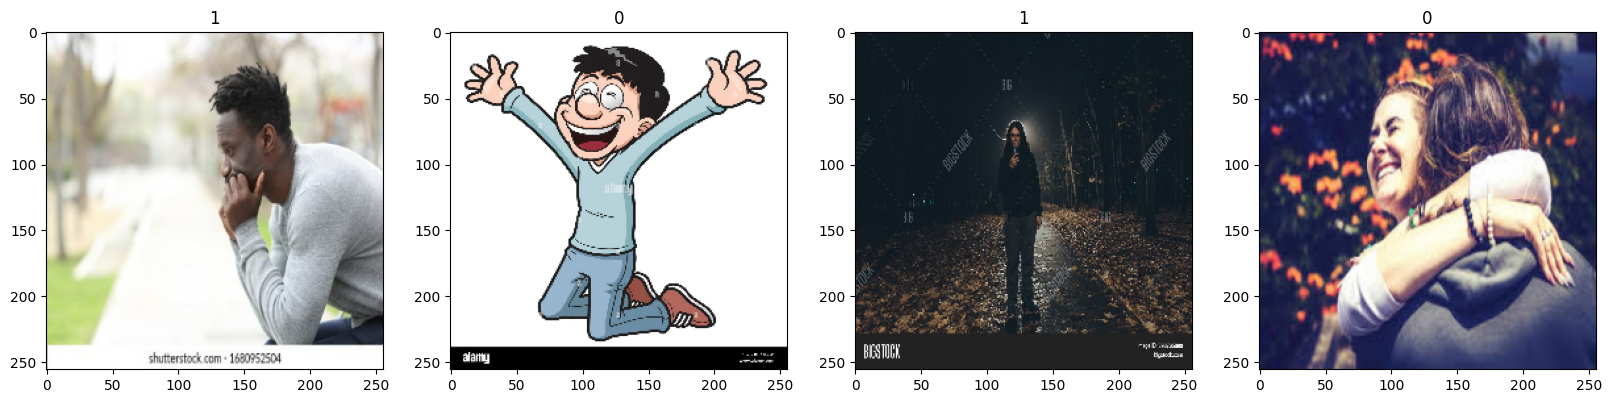

In [39]:
# subplots takes layout in rows and columns and the index of the current plot and returns a tuple (fig, ax) figure and an array of axes

fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [40]:
# happy - 0
# sad - 1

# Data Scaling for better performance of our model

In [41]:
data  = data.map(lambda x,y : (x/255, y))  # x - images & y - labels

In [52]:
data.as_numpy_iterator().next()[0].min()

0.0

In [48]:
scaled_iterator = data.as_numpy_iterator()

In [49]:
batch = scaled_iterator.next()

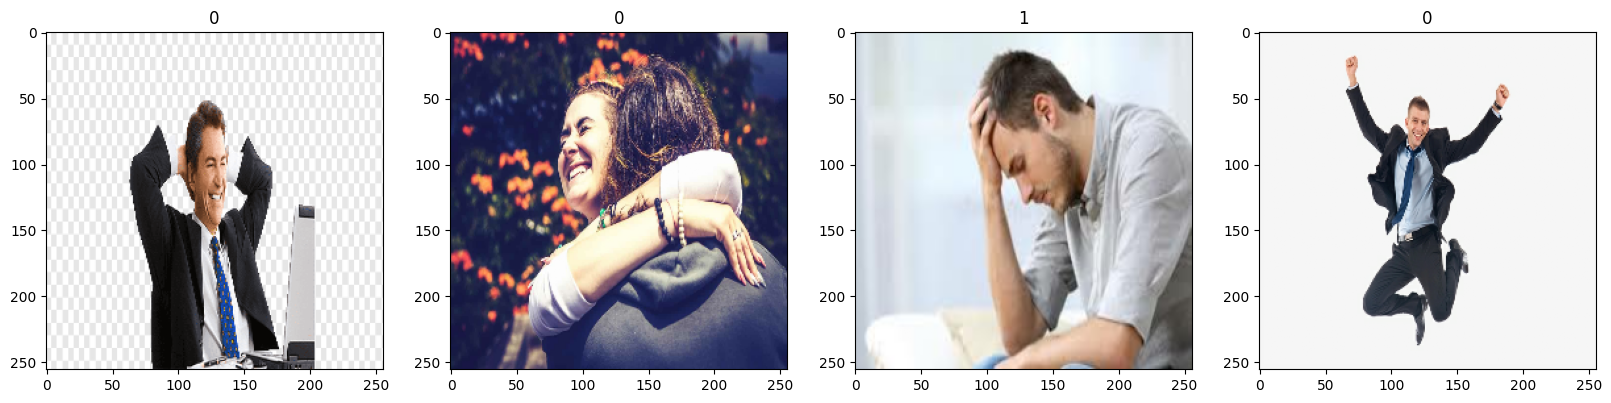

In [54]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)                     # we divided our images by 255 for scaling; they are no longer integers
    ax[idx].title.set_text(batch[1][idx])

# Splitting data

In [60]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [61]:
train_size

5

In [62]:
val_size

2

In [63]:
test_size

1

In [64]:
len(data)

8

In [66]:
train_size + val_size + test_size

8

In [67]:
training_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size+val_size).skip(test_size)

# Our deep learning model

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [69]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [70]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Training the model

In [72]:
logdir = 'logs'

In [74]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [75]:
res = model.fit(training_data, epochs=10, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/10
5/5 [==============================] - 11s 2s/step - loss: 0.9319 - accuracy: 0.5125 - val_loss: 0.6637 - val_accuracy: 0.7188
Epoch 2/10
5/5 [==============================] - 9s 2s/step - loss: 0.6524 - accuracy: 0.6812 - val_loss: 0.6007 - val_accuracy: 0.6406
Epoch 3/10
5/5 [==============================] - 9s 2s/step - loss: 0.5385 - accuracy: 0.7375 - val_loss: 0.4565 - val_accuracy: 0.7500
Epoch 4/10
5/5 [==============================] - 10s 2s/step - loss: 0.4361 - accuracy: 0.8000 - val_loss: 0.6242 - val_accuracy: 0.6875
Epoch 5/10
5/5 [==============================] - 10s 2s/step - loss: 0.4335 - accuracy: 0.8125 - val_loss: 0.3413 - val_accuracy: 0.8125
Epoch 6/10
5/5 [==============================] - 9s 2s/step - loss: 0.3247 - accuracy: 0.8875 - val_loss: 0.2930 - val_accuracy: 0.9375
Epoch 7/10
5/5 [==============================] - 10s 2s/step - loss: 0.3030 - accuracy: 0.9062 - val_loss: 0.2008 - val_accuracy: 0.9219
Epoch 8/10
5/5 [=====================

# Plotting performance 

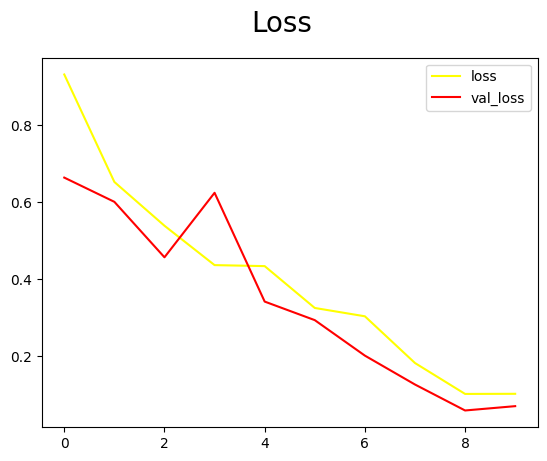

In [78]:
fig = plt.figure()
plt.plot(res.history['loss'], color='yellow', label='loss')
plt.plot(res.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

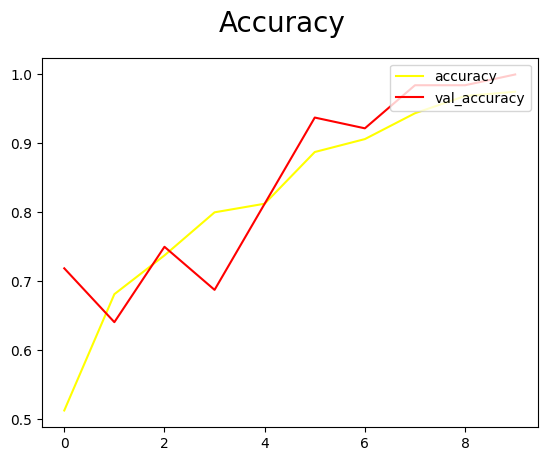

In [79]:
fig = plt.figure()
plt.plot(res.history['accuracy'], color='yellow', label='accuracy')
plt.plot(res.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper right')
plt.show()

# Testing the model

In [86]:
import cv2

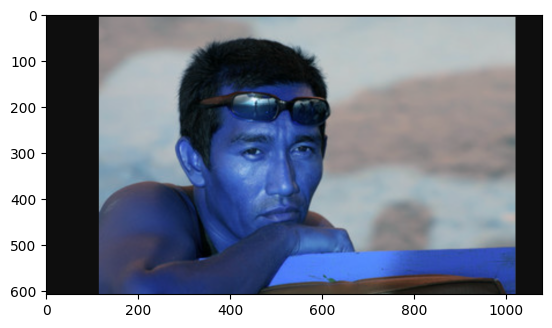

In [89]:
img = cv2.imread('side_test.png')
plt.imshow(img)
plt.show()


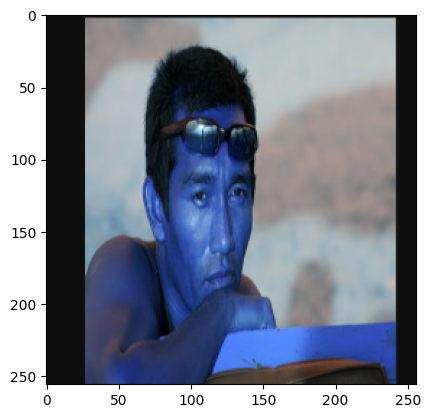

In [91]:
resized_image = tf.image.resize(img,(256,256))
plt.imshow(resized_image.numpy().astype(int))
plt.show()

In [94]:
y_pred = model.predict(np.expand_dims(resized_image/255,0))

1/1 [==============================] - 0s 154ms/step


In [95]:
y_pred

array([[0.9545017]], dtype=float32)

# Saving the model

In [96]:
from tensorflow.keras.models import load_model

In [97]:
model.save(os.path.join('models', 'imageclassifier.h5'))

# Loading the saved model

In [98]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [99]:
new_model.predict(np.expand_dims(resized_image/255,0))

1/1 [==============================] - 0s 127ms/step


array([[0.9545017]], dtype=float32)